In [1]:
import json
import pandas as pd

In [29]:


with open("LocationHistory.json") as history_file:
    location_data = json.load(history_file)

df = pd.DataFrame(location_data['locations'])

df = df.sample(n=10000)


In [30]:
df

,accuracy,activitys,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity
97516,36,NaN,NaN,NaN,13022881,1038402327,1452215977992,NaN
728459,30,NaN,NaN,NaN,374672374,-1222515545,1387630875280,NaN
14069,25,NaN,NaN,NaN,488625222,23413738,1462908641837,NaN
531579,1085,NaN,NaN,NaN,374761629,-1222229520,1403968858621,NaN
227204,35,"[{u'activities': [{u'confidence': 72, u'type':...",NaN,NaN,559465265,-31994376,1434315067303,NaN
103163,20,"[{u'activities': [{u'confidence': 100, u'type'...",NaN,NaN,467293574,-1165371147,1451505536491,NaN
951885,6,NaN,12.0,272.0,374205088,-1220774437,1369881190073,13.0
149151,41,"[{u'activities': [{u'confidence': 100, u'type'...",NaN,NaN,374673360,-1222514762,1443898344707,NaN
26675,36,"[{u'activities': [{u'confidence': 58, u'type':...",NaN,NaN,599238387,303683485,1461342285280,NaN
588635,1309,NaN,NaN,NaN,374751422,-1222248205,1398763998604,NaN


In [32]:
import datetime

def dateparse (time_in_ms):    
    return datetime.datetime.fromtimestamp(float(time_in_ms)/1000)


df['time']= df['timestampMs'].apply(dateparse)

df['latitude'] = df['latitudeE7']/float(1e7)
df['longitude'] = df['longitudeE7']/float(1e7)

df = df.drop(['latitudeE7','longitudeE7'], axis=1)
df = df[df.latitude<60]
df = df.set_index('time',)

KeyError: 'latitudeE7'

In [ ]:
df

/Users/ablevins/tools/venv27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


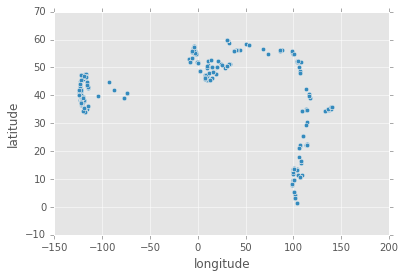

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

df.plot.scatter(x='longitude', y='latitude');


In [6]:
from sklearn import DBSCAN

clusterer = DBSCAN(eps=1)
clusterer.fit()

ImportError: cannot import name DBSCAN

In [ ]:
import husl

In [ ]:
df =df.sort_index()


min_date = df.index[0]
max_date = df.index[-1]

daterange = max_date-min_date

def make_color_range(x):
    return husl.husl_to_hex(255*x,80,80)

df['completion'] = (df.index-min_date)/daterange
df['color'] = df['completion'].apply(make_color_range)

In [ ]:

df = df.drop(['heading','activitys','accuracy','altitude','velocity','completion'], axis=1)
df

In [26]:
df = df[df.longitude>-60]
df = df.loc[df['timestampMs'] <= 1451606400000]

In [27]:
df

In [14]:
import cPickle as pickle
pickle.dump(df,open('locations.pkl','w'))

'228'